In [1]:
%pylab inline

import numpy as np
import pandas as pd
from skimage.io import imread_collection
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

import tensorflow as tf
import keras

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


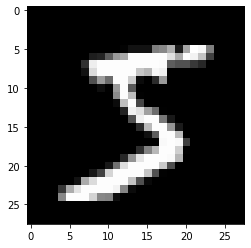

In [3]:
# select an image from the dataset
selected_image = x_train[0]

# view the image
plt.imshow(selected_image, cmap='gray')
plt.show()

In [30]:
#reshape the data so it can fit the neural network model
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10) #reshape into categorical data 0 or 1 
y_test = to_categorical(y_test, num_classes=10)

## Start with building a simple neural network with 5 hidden layers, each having 500 nodes.

In [10]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# define vars
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 10
batch_size = 128

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 16s 33ms/step - loss: 0.9193 - accuracy: 0.9033 - val_loss: 0.1467 - val_accuracy: 0.9559
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1231 - accuracy: 0.9631 - val_loss: 0.1229 - val_accuracy: 0.9645
Epoch 3/10
469/469 [==============================] - 16s 35ms/step - loss: 0.0999 - accuracy: 0.9699 - val_loss: 0.1364 - val_accuracy: 0.9617
Epoch 4/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0806 - accuracy: 0.9755 - val_loss: 0.1534 - val_accuracy: 0.9602
Epoch 5/10
469/469 [==============================] - 16s 33ms/step - loss: 0.0758 - accuracy: 0.9773 - val_loss: 0.1456 - val_accuracy: 0.9601
Epoch 6/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0710 - accuracy: 0.9787 - val_loss: 0.1093 - val_accuracy: 0.9739
Epoch 7/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0597 - accuracy: 0.9821 - val_loss: 0.1336 - val_accuracy:

## L2 regularizer

In [36]:
from keras import regularizers

model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l2(0.0001)),

Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 19s 38ms/step - loss: 1.0656 - accuracy: 0.9050 - val_loss: 0.4013 - val_accuracy: 0.9490
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.3412 - accuracy: 0.9632 - val_loss: 0.3551 - val_accuracy: 0.9599
Epoch 3/10
469/469 [==============================] - 18s 37ms/step - loss: 0.3018 - accuracy: 0.9730 - val_loss: 0.3441 - val_accuracy: 0.9624
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2808 - accuracy: 0.9756 - val_loss: 0.3854 - val_accuracy: 0.9483
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.2666 - accuracy: 0.9775 - val_loss: 0.3029 - val_accuracy: 0.9690
Epoch 6/10
469/469 [==============================] - 18s 39ms/step - loss: 0.2478 - accuracy: 0.9812 - val_loss: 0.2731 - val_accuracy: 0.9736
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 0.2337 - accuracy: 0.9825 - val_loss: 0.2901 - val_accuracy:

Regularization parameter :```l2(0.0001)```
- A smaller value for the regularization parameter means that the regularization term has less influence on the loss function, and therefore the model will have more freedom to adjust the weights

Result: Some improvement on the validation 

## L1 regularizer

In [40]:
model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu',
 kernel_regularizer=regularizers.l1(0.0001)),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 20s 40ms/step - loss: 5.0762 - accuracy: 0.9044 - val_loss: 3.9490 - val_accuracy: 0.9482
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 3.4755 - accuracy: 0.9642 - val_loss: 3.0819 - val_accuracy: 0.9624
Epoch 3/10
469/469 [==============================] - 20s 42ms/step - loss: 2.7210 - accuracy: 0.9722 - val_loss: 2.4602 - val_accuracy: 0.9584
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 2.1461 - accuracy: 0.9736 - val_loss: 1.9199 - val_accuracy: 0.9708
Epoch 5/10
469/469 [==============================] - 26s 56ms/step - loss: 1.6827 - accuracy: 0.9757 - val_loss: 1.5237 - val_accuracy: 0.9664
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 1.3215 - accuracy: 0.9754 - val_loss: 1.2229 - val_accuracy: 0.9641
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - loss: 1.0351 - accuracy: 0.9768 - val_loss: 0.9359 - val_accuracy:

Result: No improvement on the validation

## Dropout

In [43]:
## dropout

from keras.layers.core import Dropout
model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),

Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])

The value 0.25 is the dropout rate, it is the percentage of the input units that will be randomly set to 0. So, in this case, with a dropout rate of 0.25, 25% of the input units to the layer will be set to 0 during each training iteration.

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(x_train, y_train, epochs =epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 19s 39ms/step - loss: 1.5708 - accuracy: 0.7531 - val_loss: 0.2275 - val_accuracy: 0.9376
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.3240 - accuracy: 0.9099 - val_loss: 0.1563 - val_accuracy: 0.9556
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.2386 - accuracy: 0.9349 - val_loss: 0.1372 - val_accuracy: 0.9617
Epoch 4/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1961 - accuracy: 0.9464 - val_loss: 0.1249 - val_accuracy: 0.9671
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1701 - accuracy: 0.9543 - val_loss: 0.1259 - val_accuracy: 0.9664
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1510 - accuracy: 0.9595 - val_loss: 0.1175 - val_accuracy: 0.9684
Epoch 7/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1488 - accuracy: 0.9615 - val_loss: 0.1131 - val_accuracy:

## data augmentation

In [37]:
from keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(zca_epsilon= 1e-7, zca_whitening = True)
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [38]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [39]:
#reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# fit parameters from data
datagen.fit(X_train)

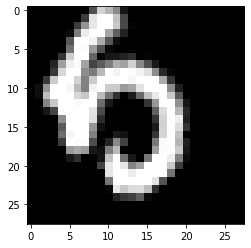

In [43]:
# Generate augmented images
for x_batch, y_batch in datagen.flow(X_train, Y_train, batch_size=3):
    # Show the images
    plt.imshow(x_batch[0].squeeze(), cmap='gray')
    plt.show()
    # stop the loop after one image is shown
    break

 `.squeeze()` method is used to remove the singleton dimensions of the image.

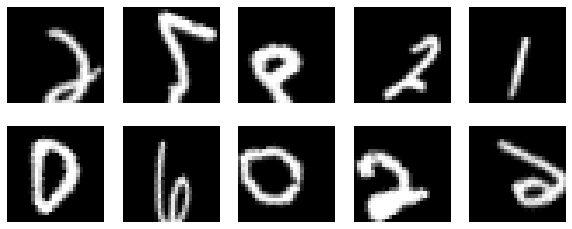

In [44]:
import matplotlib.pyplot as plt

# Generate augmented images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
axes = axes.ravel()
for i, (x_batch, y_batch) in enumerate(datagen.flow(X_train, Y_train, batch_size=1)):
    if i > 9:
        break
    axes[i].imshow(x_batch[0].squeeze(), cmap='gray')
    axes[i].axis('off')
plt.show()


In [45]:
#reshape the data so it can fit the neural network model
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10) #reshape into categorical data 0 or 1 
Y_test = to_categorical(Y_test, num_classes=10)

In [46]:
## structure using dropout
from keras.layers.core import Dropout
model = Sequential([
 Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
 Dropout(0.25),
 Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
 Dropout(0.25),
Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


In [47]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 12s 24ms/step - loss: 1.4746 - accuracy: 0.7619 - val_loss: 0.2297 - val_accuracy: 0.9347
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.3137 - accuracy: 0.9112 - val_loss: 0.1721 - val_accuracy: 0.9540
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.2295 - accuracy: 0.9355 - val_loss: 0.1419 - val_accuracy: 0.9609
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1900 - accuracy: 0.9481 - val_loss: 0.1136 - val_accuracy: 0.9690
Epoch 5/10
469/469 [==============================] - 13s 27ms/step - loss: 0.1711 - accuracy: 0.9543 - val_loss: 0.1139 - val_accuracy: 0.9671
Epoch 6/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1566 - accuracy: 0.9573 - val_loss: 0.1023 - val_accuracy: 0.9722
Epoch 7/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1433 - accuracy: 0.9625 - val_loss: 0.1234 - val_accuracy:

## Early dropping 

In [20]:
from keras.callbacks import EarlyStopping
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model_5d = model.fit(X_train, Y_train, epochs =epochs, batch_size=batch_size, validation_data=(X_test, Y_test)
 , callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/10
469/469 [==============================] - 12s 24ms/step - loss: 0.1681 - accuracy: 0.9674 - val_loss: 0.1294 - val_accuracy: 0.9765
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1548 - accuracy: 0.9673 - val_loss: 0.1139 - val_accuracy: 0.9758
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1468 - accuracy: 0.9681 - val_loss: 0.1554 - val_accuracy: 0.9771
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1323 - accuracy: 0.9717 - val_loss: 0.1471 - val_accuracy: 0.9757
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1161 - accuracy: 0.9743 - val_loss: 0.1348 - val_accuracy: 0.9749


The monitor argument specifies which metric to use to determine when to stop the training. The val_acc value means that the callback will use the validation accuracy to determine if the training should stop. So, if the accuracy on the validation set stops improving for more than 2 consecutive epochs, the training will be stopped.

The patience argument specifies the number of epochs to wait before stopping the training when the monitored metric stops improving. In this case, patience=2 means that if the validation accuracy does not improve for two consecutive epochs, the training will be stopped.
